# Анализ успешности компьютерных игр

<strong> Данные </strong>

Нам даны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) из открытых источников до 2016 года

<strong>Задача</strong>

Выявление закономерностей, определяющих успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Шаг 1. Открываем файл, знакомимся с данными

In [1]:
import pandas as pd
import matplotlib. pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Шаг 2. Обработка данных

- <code style="background:lavender;color:black">Приведем названия столбцов к нижнему регистру

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- <code style="background:lavender;color:black">Преобразуем данные в нужные типы

<code style="background:lemonchiffon;color:black">В столбце 'year_of_release' поменяем тип данных на int, так как это года. Но, так как в этом столбце есть пропуски, надо сначала избавиться от пропусков, а потом уже менять тип. Пропуски в столбцах с названием, жанром и годом скорее всего образовались из-за того, что не было данных. Пропуски с рейтингах, потому что этим играм не поставили рейтинг

### Обработаем пропуски

<code style="background:lemonchiffon;color:black">Посмотрим на пропуски в столбце 'year_of_release' и 'name'

In [7]:
df[df['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [8]:
len(df[df['year_of_release'].isna()])/len(df['year_of_release'])

0.01609332934489979

<code style="background:mistyrose;color:black">Проверяем долю пропусков от всего объема по столбцу с годами выпуска, чтобы определить можем ли мы удалить пропуски без риска потерять большую часть данных

In [9]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


<code style="background:lemonchiffon;color:black">Поскольку строк с пропусками в годах чуть больше 1%, 
а в столбце с названиями игр всего 2 пропуска, мы можем удалить пропуски

In [10]:
df.dropna(subset = ['year_of_release', 'name'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null float64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<code style="background:lemonchiffon;color:black">Пропуски в столбцах с рейтингами оставим пустыми

<code style="background:lemonchiffon;color:black">Поменяем тип года на int

In [12]:
df['year_of_release'] = df['year_of_release'].astype('int')

<code style="background:lemonchiffon;color:black">В столбце 'user_score' находится значение 'tbd'

In [13]:
df[df['user_score'] == 'tbd'].sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11322,ESPN NFL Primetime 2002,PS2,2001,Sports,0.04,0.03,0.0,0.01,65.0,tbd,E


<code style="background:lemonchiffon;color:black">tbd означает, что пользователь пока не решил, какую оценку поставит и сделает это позже. Заменим эти значения на пропуски, так как текстовые значения будут мешать построению графиков и матрицы корреляции

In [14]:
df['user_score'] = df['user_score'].replace('tbd', 'NaN')

<code style="background:lemonchiffon;color:black">Поменяем тип этого столбца на float

In [15]:
df['user_score'] = df['user_score'].astype('float')

- <code style="background:lavender;color:black">Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [16]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [17]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Шаг 3. Исследовательский анализ данных

In [18]:
df.groupby('year_of_release')['name'].count().to_frame().reset_index()

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


<code style="background:lemonchiffon;color:black">Кол-во выпускаемых видеоигр заметно выросло. Основной скачок произошел в 90-ые. Для прогноза продаж на 2017-й год важны не все периоды, все-таки с 80-х годов многое изменилось

- <code style="background:lavender;color:black">Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Узнаем, за какой характерный срок появляются новые и исчезают старые платформы.

In [19]:
platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head().to_frame().reset_index()
platforms

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


<code style="background:lemonchiffon;color:black">Выбрали 5 платформ с наибольшим кол-вом продаж

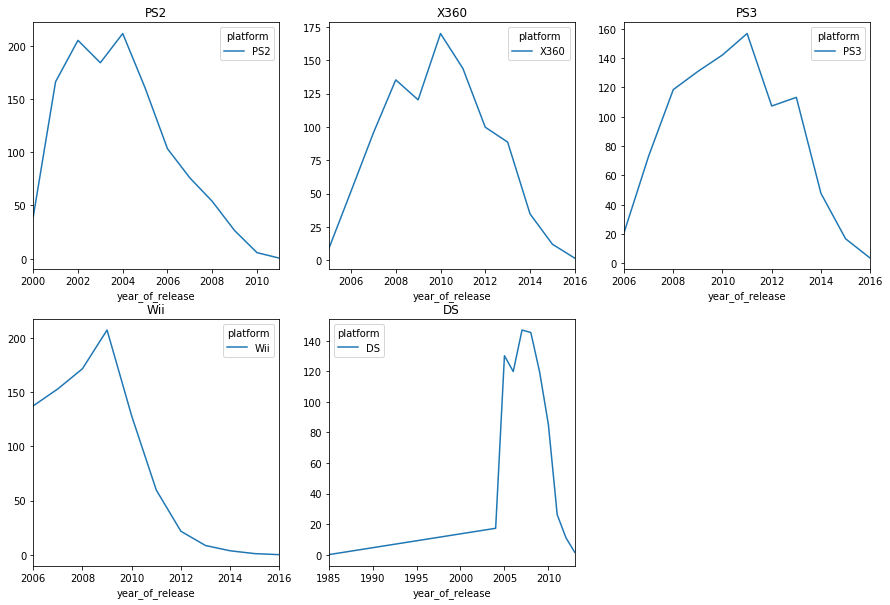

In [20]:
plt.subplots(figsize=(15, 10))
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
num_cols = 2
num_rows = len(platforms) // num_cols + 1
for i, element in enumerate(platforms):
    (
        df
        .query('platform == @element')
        .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
        .plot(ax = plt.subplot(num_cols, num_rows, i+1))
    )
    plt.title(element)

<code style="background:lemonchiffon;color:black">Жизненный цикл для большинства платформ примерно 10 лет, однако у многих имеются длинные хвосты умирания или долгий вход на рынок, поэтому актуальный период будет короче

- <code style="background:lavender;color:black">Возьмем данные за актуальный период.

In [21]:
df.groupby('year_of_release')['name'].count().to_frame().reset_index().tail(5)

,year_of_release,name
32,2012,653
33,2013,544
34,2014,581
35,2015,606
36,2016,502


<code style="background:lemonchiffon;color:black">За актуальный период возьмем 5 лет. Жизненный цикл платформы примерно 10 лет, но у большинства платформ имеется "длинный хвост", когда платформа уже "долго и постепенно умирает" и находится в районе продаж ниже 50 млн еще несколько лет. Платформа DS, наоборот, очень долго разгонялась и с 1985 по 2004 находилась на уровне продаж ниже 50млн, и актуальный период для нее, в итоге, тоже оказался примерно 5 лет. За последние 5 лет, с 2012 - 2016 года, выпускалось примерно 600 новых игр в год.

In [22]:
df = df.query('year_of_release > 2011')
len(df)

2886

<code style="background:lemonchiffon;color:black">Оставили данные с 2012 по 2016 год. Длина таблицы 2886 строк, далее будем анализировать по ней.

In [23]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head().to_frame().reset_index()

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32


<code style="background:lemonchiffon;color:black">За последние 5 лет, больше всего продаж было по этим 5-ти платформам. Теперь посмотрим, росли они или падали за это время

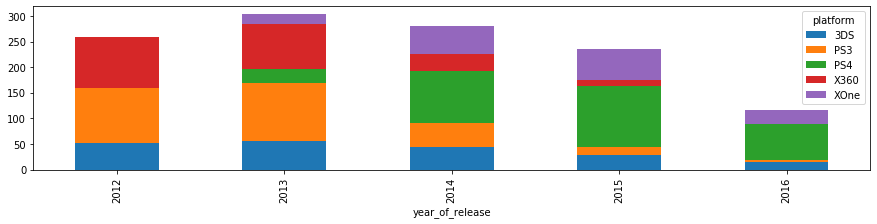

In [24]:
fig, ax = plt.subplots(figsize=(15, 3))
top_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
(
    df
    .query('platform.isin(@top_platforms)')
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(ax = ax, kind='bar', stacked=True)
)

<code style="background:lemonchiffon;color:black">Продажи по платформам за это время поднимались, достигали пика, а затем падали

- <code style="background:lavender;color:black">Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

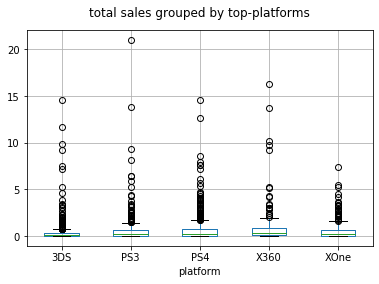

In [25]:
top_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
df.query('platform in @top_platforms').boxplot('total_sales', by = 'platform')
plt.title('')
plt.suptitle('total sales grouped by top-platforms')
plt.show()

<code style="background:lemonchiffon;color:black">Медианные значения на платформах PS и X360 выше, чем на остальных, все выбросы до 23 млн.

- <code style="background:lavender;color:black">Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

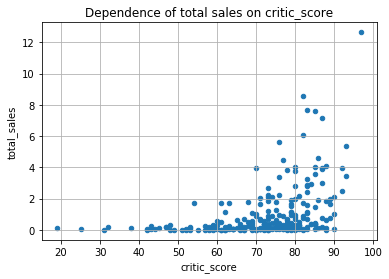

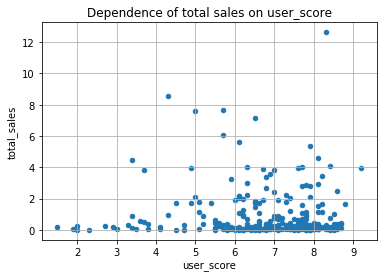

In [26]:
df_PS4 = df.query('platform == "PS4"')
for element in ['critic_score', 'user_score']:
    df_PS4.plot(kind='scatter', y='total_sales', x=element, grid=True)
    plt.title('Dependence of total sales on ' + element)

In [27]:
df_PS4['total_sales'].corr(df_PS4['critic_score'])

0.406567902061781

In [28]:
df_PS4['total_sales'].corr(df_PS4['user_score'])

-0.031957110204556424

<code style="background:lemonchiffon;color:black">Посмотрели на примере самой популярной платформы PS4. Существует средняя прямая зависимость между объемом продаж и отзывами критиков. И практически нету связи между отзывами пользователей и кол-вом продаж

- <code style="background:lavender;color:black">Посмотрим на других платформах

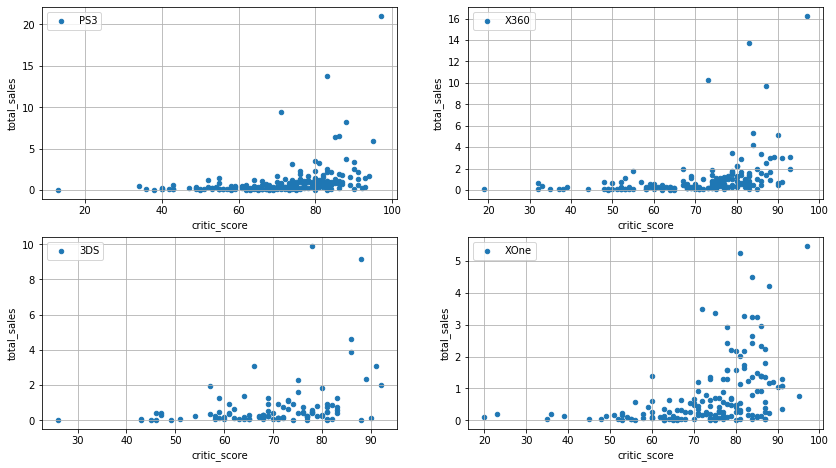

In [29]:
plt.subplots(figsize=(14, 12))
platforms = ['PS3', 'X360', '3DS', 'XOne']
num_cols = 2
num_rows = len(platforms)// num_cols+1
for i, element in enumerate(platforms):
    (
        df
        .query('platform == @element')
        .plot(ax = plt.subplot(num_rows, num_cols, i+1), kind='scatter', y='total_sales', x='critic_score', grid=True, label=element)
    )

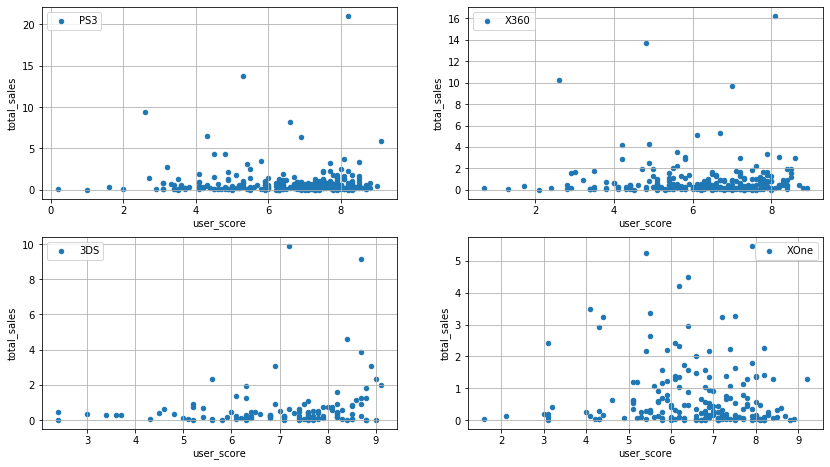

In [30]:
plt.subplots(figsize=(14, 12))
platforms = ['PS3', 'X360', '3DS', 'XOne']
num_cols = 2
num_rows = len(platforms)// num_cols+1
for i, element in enumerate(platforms):
    (
        df
        .query('platform == @element')
        .plot(ax = plt.subplot(num_rows, num_cols, i+1), kind='scatter', y='total_sales', x='user_score', grid=True, label=element)
    )

<code style="background:lemonchiffon;color:black">На других платформах также, между отзывами критиков и объемом продаж есть средняя связь, а между отзывами пользователей и продажами практически нету.

- <code style="background:lavender;color:black">Посмотрим на общее распределение игр по жанрам.

In [31]:
df_genre_sales = df.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
df_genre_sales

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00
6,Racing,53.50
2,Fighting,44.49
9,Simulation,35.12
1,Adventure,29.43


In [32]:
df_genre_sales['total_sales'].mean()

120.5441666666664

In [33]:
df_genre_sales['total_sales'].describe()

count     12.000000
mean     120.544167
std      135.220519
min        4.890000
25%       33.697500
50%       57.250000
75%      184.002500
max      441.120000
Name: total_sales, dtype: float64

<code style="background:lemonchiffon;color:black">Больше всего проданных копий в жанрах "Action" и "Shooter", меньше всего в жанре "Puzzle". Можно сказать, что выделяются жанры с высокими и низкими продажами.\
    Среднее = 120 млн. Максимум у нас 441млн, минимум 4.9 млн. За высокие можем взять всё, что выше 75%, то есть выше 184 млн, а за низкие менее 25%, то есть это ниже 33млн. Тогда жанры с высокими продажами - это "Action", 'Shooter', 'Role-Playing', а с низкими - 'Adventure', 'Strategy', 'Puzzle'.

## Шаг 4. Составление портрета пользователя по регионам

- <code style="background:lavender;color:black">Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5)

,platform,na_sales,eu_sales,jp_sales
0,3DS,0.093592,0.084132,0.455862
1,DS,0.007767,0.006965,0.019317
2,PC,0.032354,0.074504,0.000000
3,PS3,0.174933,0.210844,0.183249
4,PS4,0.184003,0.278383,0.082875
5,PSP,0.000220,0.000829,0.054367
6,PSV,0.018580,0.022414,0.109253
7,Wii,0.029528,0.023519,0.017603
8,WiiU,0.064470,0.049584,0.067556
9,X360,0.236983,0.147034,0.008152


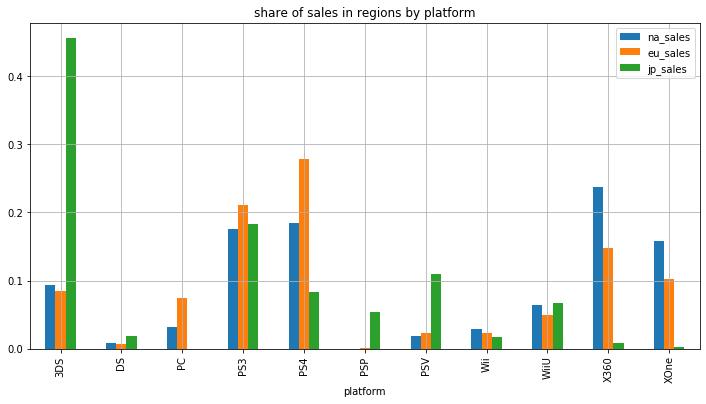

In [34]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
df_regions_platforms = df.groupby('platform')['na_sales', 'eu_sales', 'jp_sales'].sum().reset_index()
for col in columns:
    df_regions_platforms[col] = df_regions_platforms[col]/df_regions_platforms[col].sum()
df_regions_platforms.plot(kind='bar', x='platform', figsize=(12, 6), grid=True, title='share of sales in regions by platform')
df_regions_platforms

<code style="background:lemonchiffon;color:black">Набор из топ-5 популярных платформ в Америке и Европе одинаков, это PS4, PS3, X360, XOne, 3DS.
В Японии популярно другие - 3DS(занимает почти половину всего объема продаж в Японии), PS3, PSV, PS4, WiiU.

- <code style="background:lavender;color:black">Самые популярные жанры (топ-5)

,genre,na_sales,eu_sales,jp_sales
0,Action,0.300929,0.314392,0.274172
1,Adventure,0.015094,0.018665,0.042787
2,Fighting,0.033487,0.021290,0.049019
3,Misc,0.064623,0.051932,0.066777
4,Platform,0.042946,0.042244,0.044813
5,Puzzle,0.001912,0.002762,0.011112
6,Racing,0.029139,0.053846,0.012982
7,Role-Playing,0.108297,0.095754,0.339807
8,Shooter,0.244970,0.223886,0.047928
9,Simulation,0.013486,0.028708,0.054055


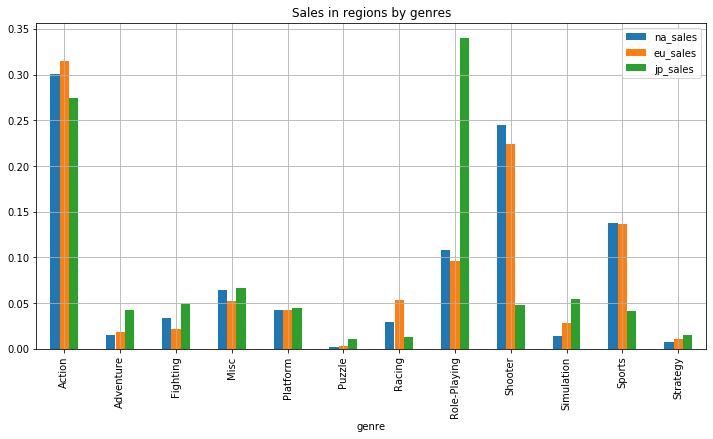

In [35]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
df_regions_genres = df.groupby('genre')['na_sales', 'eu_sales', 'jp_sales'].sum().reset_index()
for col in columns:
    df_regions_genres[col] = df_regions_genres[col]/df_regions_genres[col].sum()
df_regions_genres.plot(kind='bar', x='genre', grid=True, figsize=(12, 6), title='Sales in regions by genres')
df_regions_genres

<code style="background:lemonchiffon;color:black">В Америке самые популярные жанры - Action(треть продаж), Shooter, Sports, Role-Playing, Misc.
В Европе -  Action(треть продаж), Shooter, Sports, Role-Playing, Racing.
В Японии - Role-Playing(треть продаж), Action, Misc, Simulation, Fighting

- <code style="background:lavender;color:black">Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

,eu_sales,jp_sales,na_sales
rating,,,
E,0.272152,0.338309,0.234528
E10+,0.133319,0.097803,0.155231
M,0.467013,0.253165,0.474860
T,0.127516,0.310724,0.135381


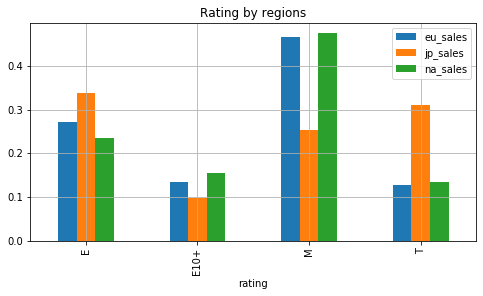

In [36]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
df_regions_rating = df.pivot_table(index='rating', values = columns, aggfunc='sum')
for col in columns:
    df_regions_rating[col] = df_regions_rating[col]/df_regions_rating[col].sum()
df_regions_rating.plot(kind='bar', grid=True, title='Rating by regions', figsize=(8, 4))
df_regions_rating

<code style="background:lemonchiffon;color:black">Игры с рейтингом "М" занимают почти половину продаж в Америке и Европе, а в Японии меньше трети. Игры с рейтингом "Т" в Японии занимают больше трети, а в Америке и Европе чуть больше 10%. Так что, можно сказать, что в зависимости от рейтинга в разных регионах объем продаж различается.

<code style="background:mistyrose;color:black">Построим еще круговые диаграммы

,eu_sales,jp_sales,na_sales
platform,,,
3DS,0.084132,0.455862,0.093592
DS,0.006965,0.019317,0.007767
PC,0.074504,0.000000,0.032354
PS3,0.210844,0.183249,0.174933
PS4,0.278383,0.082875,0.184003
PSP,0.000829,0.054367,0.000220
PSV,0.022414,0.109253,0.018580
Wii,0.023519,0.017603,0.029528
WiiU,0.049584,0.067556,0.064470


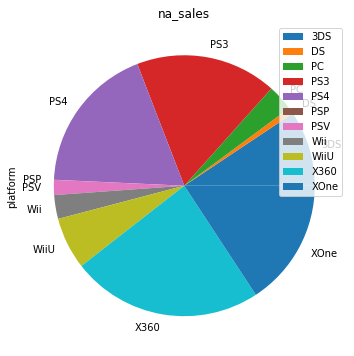

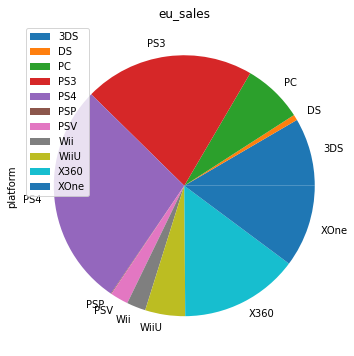

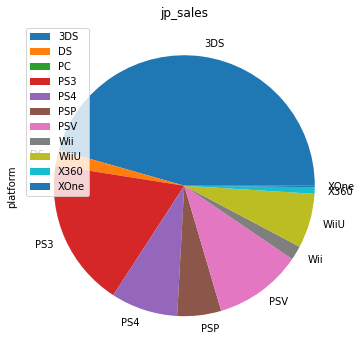

In [37]:
columns_1 = ['na_sales', 'eu_sales', 'jp_sales']
df1 = df.pivot_table(index='platform', values=columns_1, aggfunc='sum')
for col in columns_1:
    df1[col] = df1[col]/df1[col].sum()
    df1.plot(kind='pie', y=col, title=col, label='platform', figsize=(12, 6))
df1

,eu_sales,jp_sales,na_sales
rating,,,
E,0.272152,0.338309,0.234528
E10+,0.133319,0.097803,0.155231
M,0.467013,0.253165,0.474860
T,0.127516,0.310724,0.135381


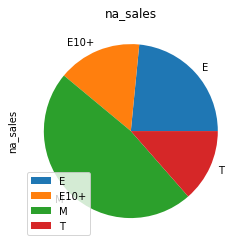

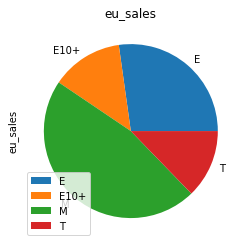

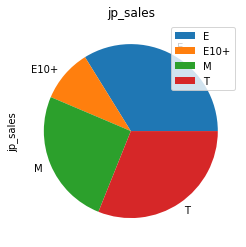

In [38]:
columns = ['na_sales', 'eu_sales', 'jp_sales']
df_regions_rating = df.pivot_table(index='rating', values = columns, aggfunc='sum')
for col in columns:
    df_regions_rating[col] = df_regions_rating[col]/df_regions_rating[col].sum()
    df_regions_rating.plot(kind='pie', y=col, title=col, figsize=(8, 4))
df_regions_rating

##  Шаг 5. Проверка гипотез

### Проверка 1-ой гипотезы

- <code style="background:lavender;color:black">Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [39]:
from scipy import stats as st
import math

In [40]:
sample1_1 = df.query('(platform == "XOne") and ~(user_score.isna())')['user_score']

In [41]:
len(sample1_1)

182

In [42]:
sample1_2 = df.query('platform == "PC" and ~(user_score.isna())')['user_score']

In [43]:
len(sample1_2)

206

<code style="background:lemonchiffon;color:black">Выдвигаем нулевую гипотезу: среднее двух генеральных совокупностей равно. Альтернативная: среднее двух ген.совокупностей различается.

In [44]:
variance_estimate1_1 = np.var(sample1_1, ddof=1)
variance_estimate1_1

1.9069968429360695

In [45]:
variance_estimate1_2 = np.var(sample1_2, ddof=1)
variance_estimate1_2

2.770443997158418

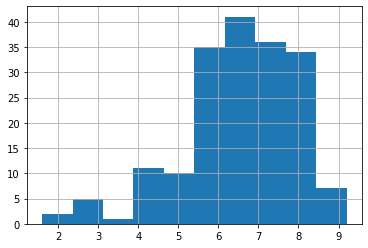

In [46]:
sample1_1.hist(bins=10)

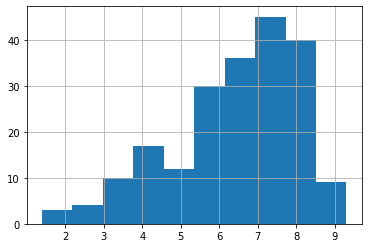

In [47]:
sample1_2.hist(bins=10)

In [48]:
alpha = 0.05

In [49]:
results1 = st.ttest_ind(sample1_1, sample1_2, equal_var=False)

In [50]:
results1.pvalue

0.5489537965134912

In [51]:
if (results1.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Не получилось отвергнуть нулевую гипотезу


<code style="background:lemonchiffon;color:black">Не получилось отвергнуть нулевую гипотезу, значит средние пользовательские рейтингп на Xbox и PC могут быть одинаковы, и гипотеза может быть верна.

### Проверка 2-ой гипотезы 

- <code style="background:lavender;color:black">Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [52]:
sample2_1 = df.query('(genre == "Action") and ~(user_score.isna())')['user_score']

In [53]:
len(sample2_1)

523

In [54]:
sample2_2 = df.query('(genre == "Sports") and ~(user_score.isna())')['user_score']

In [55]:
len(sample2_2)

195

<code style="background:lemonchiffon;color:black">Выдвигаем нулевую гипотезу: средние двух ген.совокупностей равны. Альтернативная: средние двух ген.совокупностей разные

In [56]:
variance_estimate2_1 = np.var(sample2_1, ddof=1)
variance_estimate2_1

1.8890840494348111

In [57]:
variance_estimate2_2 = np.var(sample2_2, ddof=1)
variance_estimate2_2

3.022890298704732

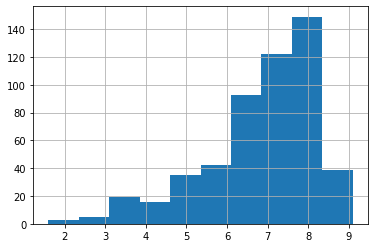

In [58]:
sample2_1.hist(bins=10)

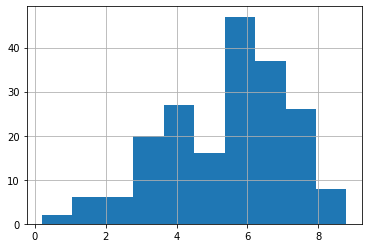

In [59]:
sample2_2.hist(bins=10)

In [60]:
results2 = st.ttest_ind(sample2_1, sample2_2, equal_var=False)

In [61]:
results2.pvalue

4.24307776572644e-20

In [62]:
if (results2.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


<code style="background:lemonchiffon;color:black">Отвергаем нулевую гипотезу, значит средние пользовательских рейтингов жанров Action и Sports могут быть разными

<code style="background:lemonchiffon;color:black">Критерием для проверки гипотез является значение p-value, сравниваем его с aplha в 5%, то есть с вероятностью того, что вычисленное значение окажется далеко от среднего

## Шаг 6. Общий вывод 

<code style="background:lemonchiffon;color:black">Проанализировав данные, можно сказать, что рекламные кампании для Америки/Европы и Японии должны существенно отличаться.
    Для Америки и Европы стоит сделать упор на игры в жанрах "Action" и "Shooter", на платформах Xbox и PS, c рейтингом М, T.
    Для Японии - игры на платформе 3DS и PS, в жанрах role-playing и Action, c рейтингом E,M,T.
    Также для всех регионов учесть оценки критиков, поскольку есть средняя зависимость от их оценок.